# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [3]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [4]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [5]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [6]:
df.BldgType.value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


### HouseStyle

In [7]:
df.HouseStyle.value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


### Heating

In [8]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


## Missing values

In [9]:
df.isna().sum()

,0
MSSubClass,0
BldgType,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
Heating,0
CentralAir,0
GrLivArea,0
BedroomAbvGr,0


## Labels distribution

In [10]:
df.Target.value_counts()

,count
Target,
0,1243
1,217


# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model
    * Set the parameter value range
        * You can use random values, interval of values, ...
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)

In [12]:
y = df['Target']
X = df.drop('Target', axis=1)


categorical_cols = ['BldgType', 'HouseStyle', 'Heating', 'CentralAir']


encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

print("--- Task 3: Processed X (features) ---")
print(X.head())
print("\n--- Task 3: y (target) ---")
print(y.head())
print("\n" + "="*50 + "\n")


# --- Task 4: Decision Tree with 5-fold Cross-Validation ---

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)

f1_scores_dt = cross_val_score(dt_clf, X, y, cv=skf, scoring='f1_macro')

mean_f1_dt = np.mean(f1_scores_dt)

print("--- Task 4: Decision Tree ---")
print(f"Decision Tree F1-Macro Scores (5 folds): {f1_scores_dt}")
print(f"Mean F1-Macro Score: {mean_f1_dt:.4f}")
print("\n" + "="*50 + "\n")


# --- Task 5: Second Algorithm (Random Forest) with 5-fold CV ---


rf_clf = RandomForestClassifier(random_state=42)
f1_scores_rf = cross_val_score(rf_clf, X, y, cv=skf, scoring='f1_macro')
mean_f1_rf = np.mean(f1_scores_rf)

print("--- Task 5: Random Forest (Default) ---")
print(f"Random Forest F1-Macro Scores (5 folds): {f1_scores_rf}")
print(f"Mean F1-Macro Score: {mean_f1_rf:.4f}")
print("\n" + "="*50 + "\n")


# --- Task 7: Hyper-parameter Experiment (Random Forest) ---
n_estimators_range = [50, 100, 150, 200, 250]
tuning_results = {}

print("--- Task 7: Starting Random Forest tuning ---")

for n in n_estimators_range:
    rf_clf_tuned = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)

    f1_scores = cross_val_score(rf_clf_tuned, X, y, cv=skf, scoring='f1_macro')

    mean_f1 = np.mean(f1_scores)
    tuning_results[n] = mean_f1
    print(f"  n_estimators = {n:3}, Mean F1-Macro = {mean_f1:.4f}")

results_df = pd.DataFrame.from_dict(tuning_results, orient='index', columns=['Mean F1-Macro'])
results_df.index.name = 'n_estimators'
print("\n--- Tuning Results (Table) ---")
print(results_df)

print("\nDisplaying tuning results plot...")
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Mean F1-Macro'], marker='o')
plt.title('Random Forest Performance by n_estimators')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Mean F1-Macro Score')
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

print("\n" + "="*50 + "\n")
print("Script finished.")

Preprocessing complete.


NameError: name 'cross_val_score' is not defined

Missing values: 0
Classes:
 Target
0    1243
1     217
Name: count, dtype: int64
Metric: F1-Macro (data is imbalanced)

Processing done. X shape: (1460, 10)

--- Decision Tree ---
Scores: [0.81610436 0.83849169 0.79930352 0.82975415 0.86364061]
Mean F1: 0.829458867382639

--- Random Forest ---
Scores: [0.8887619  0.86382937 0.82407335 0.86382937 0.91657143]
Mean F1: 0.8714130837377443

Default model comparison:
Random Forest is better

--- Tuning n_estimators ---
n=50, f1=0.8709
n=100, f1=0.8714
n=150, f1=0.8774
n=200, f1=0.8721
n=250, f1=0.8731


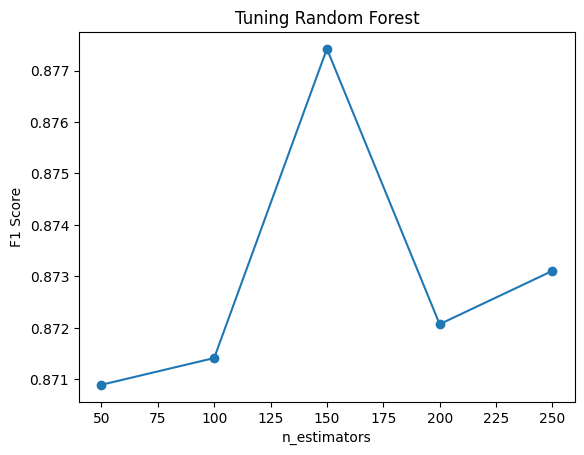


Best model: Random Forest with n = 150
Best score: 0.877424180940763
RF is better because it reduces overfitting compared to a single tree.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Load data
url = 'https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv'
df = pd.read_csv(url)

# Select columns
df = df[['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual',
         'OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]

# Create target
df['Target'] = (df.SalePrice > 250000).astype(int)
df = df.drop('SalePrice', axis=1)

# 2. Basic info and questions
print("Missing values:", df.isna().sum().sum())
print("Classes:\n", df['Target'].value_counts())
print("Metric: F1-Macro (data is imbalanced)")

# 3. Preprocessing
X = df.drop('Target', axis=1)
y = df['Target']

# Encoding categorical columns
cats = ['BldgType', 'HouseStyle', 'Heating', 'CentralAir']
enc = OrdinalEncoder()
X[cats] = enc.fit_transform(X[cats])

print("\nProcessing done. X shape:", X.shape)

# 4. Decision Tree
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=skf, scoring='f1_macro')

print("\n--- Decision Tree ---")
print("Scores:", dt_scores)
print("Mean F1:", np.mean(dt_scores))

# 5. Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=skf, scoring='f1_macro')

print("\n--- Random Forest ---")
print("Scores:", rf_scores)
print("Mean F1:", np.mean(rf_scores))

# 6. Comparison
print("\nDefault model comparison:")
if np.mean(rf_scores) > np.mean(dt_scores):
    print("Random Forest is better")
else:
    print("Decision Tree is better")

# 7. Tuning
print("\n--- Tuning n_estimators ---")
n_range = [50, 100, 150, 200, 250]
results = []

for n in n_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')
    res = np.mean(scores)
    results.append(res)
    print(f"n={n}, f1={res:.4f}")

# Plot
plt.plot(n_range, results, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('Tuning Random Forest')
plt.show()

# 8. Conclusion
best_idx = np.argmax(results)
print("\nBest model: Random Forest with n =", n_range[best_idx])
print("Best score:", results[best_idx])
